# Lista 3

## Kod


### Importowanie Bibliotek

In [347]:
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from scipy.stats import t as tp

### Funkcje

Funkcja do wygenerowania ciągu n liczb z rozkładu normalnego

In [348]:
def string_generator(n):
    result = []
    for i in range(n):
        result.append(random.gauss(0.5,0.5))
    return result

Funkcja do uzyskania dominanty z ciągu liczb

In [349]:
def dominanta(data):
    values, counts = np.unique(data, return_counts=True)
    max_count = np.max(counts)
    result = values[counts == max_count]
    if len(result) > 1:
        return "Brak dominanty"
    else:
        return result[0]

Funkcja do uzyskania statystyk opisowych z ciągu liczb

In [350]:
def statystyki(data):
    mean = np.mean(data)
    median = np.median(data)
    mode = dominanta(data)
    std = np.std(data)
    var = np.var(data)
    skew = stats.skew(data)
    kurtoza = stats.kurtosis(data,fisher=True)
    Q1, Q2, Q3 = np.percentile(data, [25, 50, 75])
    

    result = {
        'mean':mean,
        'median':median,
        'mode':mode,
        'std':std,
        'var':var,
        'skosnosc':skew,
        'kurtoza':kurtoza,
        'kwartyl_25': Q1,
        'kwartyl_50': Q2,
        'kwartyl_75': Q3
    }
    return result

Funkcja do obliczania dystrybuanty empirycznej

In [351]:
def dystrybuanta_empiryczna(data, x):
    return np.sum(data <= x) / len(data)

Funkcja do obliczania statystyki testowej dla testu kolmogorova-smirnova

In [352]:

def kolmogorov_smirnov(data, mean=0.5, std=0.5):
   
    data = np.sort(data)
    n = len(data)
    D = max(abs(dystrybuanta_empiryczna(data, x) - stats.norm.cdf(x, mean, std)) for x in data)
    p_value = 2 * np.exp(-2 * (D ** 2) * n)
    return D, p_value


Funkcja do generowania histogramów dla dwóch ciągów

In [353]:
def histogram(a,b):

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    x = np.linspace(-1, 2, 1000)
    y = norm.pdf(x, 0.5, 0.5)
    axes[0].hist(a, bins=np.linspace(-1, 2, 13), density=True, color='skyblue', edgecolor='black')
    axes[0].plot(x, y, color='red', label='Funkcja gęstości')
    axes[0].set_title(f'Histogram dla próby o długości {len(a)}')
    axes[0].set_xlabel('Wartości')
    axes[0].set_ylabel('Gęstość')
    axes[0].set_xticks(np.arange(-1, 2.25, 0.25))
    axes[0].legend()

    axes[1].hist(b, bins=np.linspace(-1, 2, 13), alpha = 0.5,density=True, color='orange', edgecolor='black')
    axes[1].plot(x, y, color='red', label='Funkcja gęstości')
    axes[1].set_title(f'Histogram dla próby o długości {len(b)}')
    axes[1].set_xlabel('Wartości')
    axes[1].set_ylabel('Gęstość')
    axes[1].set_xticks(np.arange(-1, 2.25, 0.25))
    axes[0].legend()
    
    plt.tight_layout()
    plt.show()


Funkcja do obliczania statystyki testowej t-studenta i wartości p

In [354]:
def t_value(n,std,mean,h_value):
    t = (mean - h_value)/(std/math.sqrt(n))
    p = 2 * tp.sf(abs(t), n-1)
    return t,p

## Wygenerowanie ciągu a - 15 elementowego i b - 120 elementowego

In [355]:
a = string_generator(15)

In [356]:
b = string_generator(120)

## Statystyki ciągów a i b

In [359]:
statystyki(a)

{'mean': np.float64(0.37270088767939974),
 'median': np.float64(0.4690012141639791),
 'mode': 'Brak dominanty',
 'std': np.float64(0.4961520896531639),
 'var': np.float64(0.24616689606720119),
 'skosnosc': np.float64(-0.20426291624021103),
 'kurtoza': np.float64(-0.8783732525114418),
 'kwartyl_25': np.float64(-0.05258073034610539),
 'kwartyl_50': np.float64(0.4690012141639791),
 'kwartyl_75': np.float64(0.6586003646733949)}

In [360]:
statystyki(b)

{'mean': np.float64(0.5027463169660095),
 'median': np.float64(0.48527618421723695),
 'mode': 'Brak dominanty',
 'std': np.float64(0.4741995924215169),
 'var': np.float64(0.22486525345273273),
 'skosnosc': np.float64(0.01840438662320666),
 'kurtoza': np.float64(-0.02266487385247906),
 'kwartyl_25': np.float64(0.178488573478762),
 'kwartyl_50': np.float64(0.48527618421723695),
 'kwartyl_75': np.float64(0.8161124900795171)}

## Histogramy 

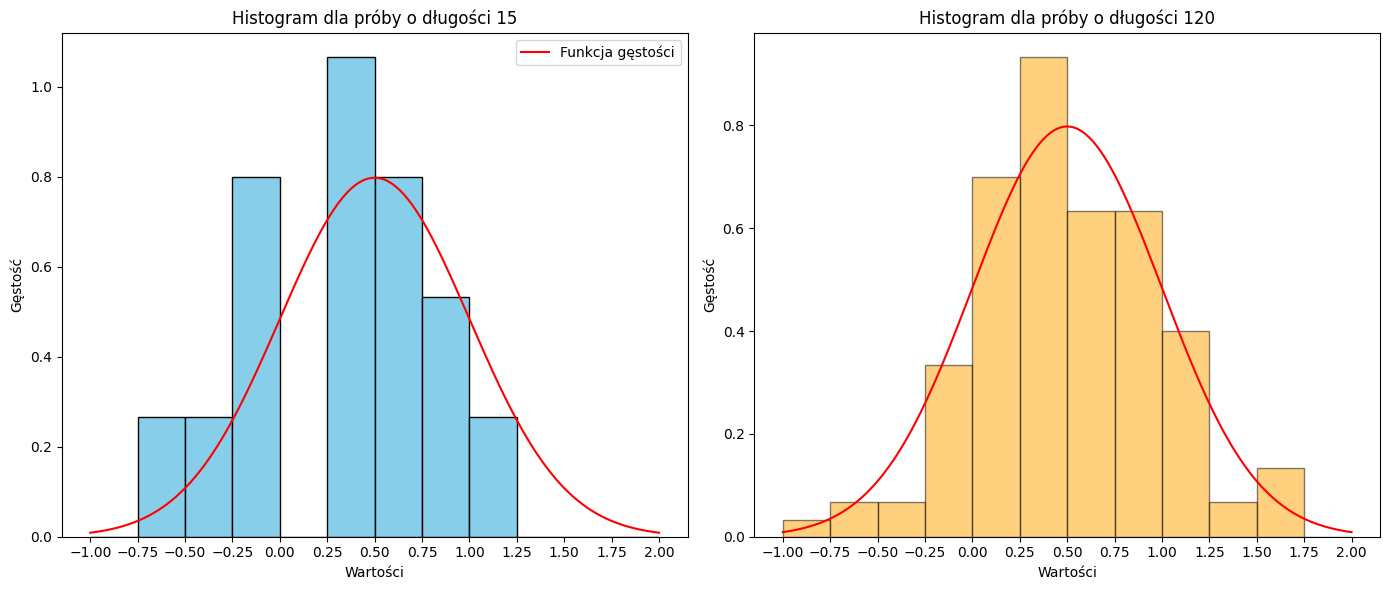

In [361]:
histogram(a,b)

## Testy statystyczne

Wynik statystyki testowej (liczba po lewej) rozkładu t-studenta dla ciągu 15 elementowego i wartości p (liczna po prawej)

In [362]:
aw = t_value(15,statystyki(a)['std'],statystyki(a)['mean'],0.5)
aw

(np.float64(-0.9937020367067767), np.float64(0.33723337767224437))

Wynik statystyki testowej (liczba po lewej) rozkładu t-studenta dla ciągu 15 elementowego i wartości p (liczna po prawej)

In [363]:
bw = t_value(15,statystyki(b)['std'],statystyki(b)['mean'],0.5)
bw

(np.float64(0.022430301591880725), np.float64(0.9824212716684085))

## Wnioski

### Statystyka Opisowa

- Średnia 

    Średnia dla rozkładu normalnego N(0.5,0.5) powinna być bliska 0.5  
    Dla ciągu 15 elementowego wynosi ona 0.373  
    Dla ciągu 120 elementowego wynosi ona 0.503  

- Mediana

    Mediana dla rozkładu normalnego N(0.5,0.5) powinna być bliska 0.5  
    Dla ciągu 15 elementowego wynosi ona 0.47    
    Dla ciągu 120 elementowego wynosi ona 0.485  

- Moda

    Dominta dla rozkładu normalnego N(0.5,0.5) powinna być bliska wartości 0.5  
    Oba ciągi nie posiadają dominanty

- Odchylenie standardowe

    Std dla rozkładu normalnego N(0.5,0.5) powinno być bliskie 0.5  
    Dla ciągu 15 elementowego wynosi ona 0.496   
    Dla ciągu 120 elementowego wynosi ona 0.474  

- Wariancja

    Wariancja dla rozkładu normalnego N(0.5,0.5) powinna być bliska 0.25   
    Dla ciągu 15 elementowego wynosi ona 0.246   
    Dla ciągu 120 elementowego wynosi ona 0.225  

- Skośność
 
    Skośność dla rozkładu normalnego N(0.5,0.5) powinna wynosić 0 gdyż jest on symetryczny  
    Dla ciągu 15 elementowego wynosi ona -0.204  
    Dla ciągu 120 elementowego wynosi ona 0.018  

- Kurtoza 

    Powinna wynosić 0 dla rozkładu normalnego N(0.5,0.5), dla standaryzacji Fishera  
    Dla ciągu 15 elementowego wynosi ona -0.878  
    Dla ciągu 120 elementowego wynosi ona -0.022  

- Kwartyle
    Dla ciągu 15 elementowego wynoszą:  
    - Q1: -0.05258073034610539  
    - Q2: 0.4690012141639791  
    - Q3: 0.6586003646733949  
    
    Dla ciągu 120 elementowego wynoszą:  
    - Q1: 0.178488573478762  
    - Q2: 0.48527618421723695 
    - Q3: 0.8161124900795171



### Testy Statystyczne

#### Test czy rozkład prób jest zgodny z rozkładem normalnym 

H0 - Rozkład próby jest rozkładem normalnym  
HA - Rozkład próby nie jest rozkładem normalnym

Poziom istotności :

In [ ]:
alpha = 0.05

Test dla ciągu a :

In [376]:
D, p_value = kolmogorov_smirnov(a)
if p_value < alpha:
    print("Odrzucamy hipotezę zerową. Rozkład ciągu nie jest normalny")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej. Rozkład ciągu jest normalny")

print(f"Wartość statystyki D: {D}, p-wartość: {p_value}")

Brak podstaw do odrzucenia hipotezy zerowej. Rozkład ciągu jest normalny
Wartość statystyki D: 0.17887622915123857, p-wartość: 0.7658614654504312


Test dla ciągu b :

In [377]:
D, p_value = kolmogorov_smirnov(b)
if p_value < alpha:
    print("Odrzucamy hipotezę zerową. Rozkład ciągu nie jest normalny")
else:

    print("Brak podstaw do odrzucenia hipotezy zerowej. Rozkład ciągu jest być normalny")

print(f"Wartość statystyki D: {D}, p-wartość: {p_value}")

Brak podstaw do odrzucenia hipotezy zerowej. Rozkład ciągu jest być normalny
Wartość statystyki D: 0.04180126688590491, p-wartość: 1.3149309587187774


#### Test czy średnia z prób jest równa 0.5 

H0 - Średnia z prób jest równa 0.5  
HA - Średnia z prób nie jest równa 0.5

poziom istotności 0.05

Dla ciągu 15 elementowego : 

In [372]:
if aw[1] < 0.05:
    print("Odrzucamy H0 i przyjmujemy HA. Średnia próby nie jest równa 0.5")
else:
    print("Nie ma wystarczających dowodów aby odrzucić H0. Średnia z próby jest równa 0.5")

Nie ma wystarczających dowodów aby odrzucić H0. Średnia z próby jest równa 0.5


Dla ciągu 120 elementowego : 

In [373]:
if bw[1] < 0.05:
    print("Odrzucamy H0 i przyjmujemy HA. Średnia próby nie jest równa 0.5")
else:
    print("Nie ma wystarczających dowodów aby odrzucić H0. Średnia z próby jest równa 0.5")

Nie ma wystarczających dowodów aby odrzucić H0. Średnia z próby jest równa 0.5


### Histogramy

Można zauważyć, że histogramy dla prób o długościach 15 i 120 mają kształt funkcji gęstości rozkłądu normalnego.   
Dla ciągu 120 elementowego histogram dokładniej mieści się w granicach tej funkcji, niż histogram dla ciągu 15 elementowego  
czego przyczyną może być różnica w liczności próby.

### Wnioski końcowe

Wyniki dla statystyki opisowej dla ciąagów 15 i 120 elementowych są zbliżone do teoretycznych wartośći rozkładu normalnego    
Według testu Kołmogorowa - Smirnowa rozkład tych dwóch prób dla poziomu instotności 0.05 jest rozkładem normalnym.   
Histogramy dla próby 15 i 120 elementowej również są podobne do rozkładu normalnego.  